# Regression Exercise On Boston Housing Dataset

### The dataset for this project originates from the UCI Machine Learning Repository but is now included into the Scikit-learn library. Thedata was collected in 1978 and contains 506 rows and 14 features for data on homes in the Boston Area. 

The feature descriptions are as follows:

**CRIM**: Per capita crime rate by town

**ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

**INDUS**: Proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**: Nitric oxide concentration (parts per 10 million)

**RM**: Average number of rooms per dwelling

**AGE**: Proportion of owner-occupied units built prior to 1940

**DIS**: Weighted distances to five Boston employment centers

**RAD**: Index of accessibility to radial highways

**TAX**: Full-value property tax rate per $10,000

**B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

**LSTAT**: Percentage of lower status of the population

**MEDV**: Median value of owner-occupied homes in $1000s

#### Importing the Libraries used

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

%matplotlib inline

#### Loading the Boston Dataset in from sklearn to a pandas dataframe

In [13]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()
#The features and target column are held separately by SKLearn, the below code combines them
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target

 #### Checking For Nulls, Luckily in this dataset, we don't need to worry about it

In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### The Data in this case is in great shape, so let's just look at the relationship between features    

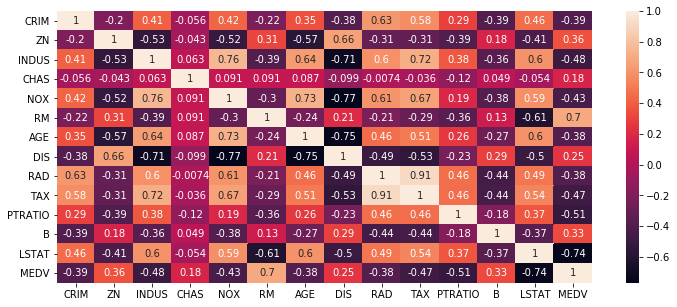

In [15]:
corr = df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True)

 #### Taking a look at the correlation matrix, LSTAT, RM, and PTRATIO have very high potential prediction value. We'll be dropping CHAS to reduce complexity as it has little to no effect on predictive power.

#### We'll also be dropping RAD, NOX, and INDUS due to high collinearity with some of the other features

In [16]:
X = df.drop(['MEDV','RAD','CHAS','NOX','INDUS'],axis=1)
Y = df['MEDV']

#Drop RAD,NOX,TAX,INDUS due to high collinearity


#Splitting the Data into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .2, random_state = 42)


#### Our First attempt to model the data will using Linear Regression and scoring using MAE and R2 as performance metrics

In [25]:
model = LinearRegression()
model.fit(X_train,Y_train)




results = model.predict(X_test)
print("MAE: " ,mean_absolute_error(results,Y_test))
print(" R2: ",r2_score(results,Y_test))

print("Testing Data Mean: ",Y_test.mean())


MAE:  3.4097557828940768
 R2:  0.5733760373275725
Testing Data Mean:  21.488235294117654


#### The Linear Regression out of the box performance is okay, The MAE leans large compared to the home values we're trying to measure. Our Line is off by roughly 3000 dollars where houses are only 21,000 dollars on Average. and from our R2, we can only explains about 57% of the relationship with our regression line    

#### For our next model, we use Random Forest Regressor with gridsearch to find an optional number of estimators. This takes a significantly longer time to run but returns with a better fit

In [8]:
estimators = []
for x in range(50,500,50):
    estimators.append(x)
test = GridSearchCV(estimator = RandomForestRegressor(),param_grid=[
  {'n_estimators': estimators}])
             

model = RandomForestRegressor()
test.fit(X_train,Y_train)





results = test.predict(X_test)
print("MAE: " ,mean_absolute_error(results,Y_test))
print("R2: ",r2_score(results,Y_test))




old MAE:  2.217016339869283
old R2:  0.8373436952237184


#### Now we have a much lower MAE and a much higher R2, this model is much better at capturing the trends of the data, you can see this looking at the model graphed against the real data below 

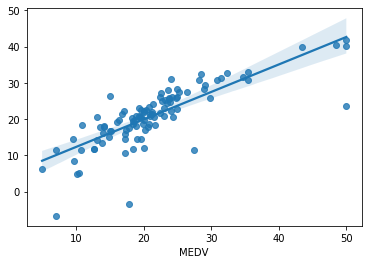

In [28]:
sns.regplot(Y_test,results)
